In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
troops = pd.read_csv("troop_movements.csv")
troops

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-02-06 16:44:24,1,at-at,empire,3,4,8,6,Stewjon
1,2024-02-06 16:44:23,2,at-at,empire,2,7,10,5,Skako
2,2024-02-06 16:44:22,3,tie_fighter,resistance,5,5,10,8,Mon Cala
3,2024-02-06 16:44:21,4,tie_silencer,resistance,6,8,9,10,Alderaan
4,2024-02-06 16:44:20,5,unknown,empire,7,3,6,7,Skako
...,...,...,...,...,...,...,...,...,...
995,2024-02-06 16:27:49,996,tie_silencer,resistance,1,10,6,10,Eriadu
996,2024-02-06 16:27:48,997,at-at,empire,5,6,2,3,Malastare
997,2024-02-06 16:27:47,998,resistance_soldier,resistance,7,7,8,6,Dathomir
998,2024-02-06 16:27:46,999,at-st,resistance,5,6,4,9,Concord Dawn


In [3]:
print(troops.groupby('empire_or_resistance').size())

empire_or_resistance
empire        479
resistance    521
dtype: int64


In [4]:
print(troops.groupby('homeworld').size())

homeworld
Alderaan        27
Aleen Minor     25
Bestine IV      38
Cerea           25
Champala        33
Chandrila       16
Concord Dawn    27
Corellia        19
Dagobah         28
Dathomir        16
Dorin           19
Eriadu          23
Glee Anselm     29
Haruun Kal      25
Iktotch         28
Iridonia        26
Kalee           24
Kashyyyk        22
Malastare       19
Mirial          24
Mon Cala        27
Muunilinst      24
Naboo           28
Ojom            18
Quermia         29
Rodia           23
Ryloth          27
Serenno         20
Shili           21
Skako           22
Socorro         23
Stewjon         22
Sullust         21
Tatooine        15
Tholoth         31
Toydaria        21
Trandosha       28
Troiken         21
Tund            21
Umbara          28
Vulpter         13
Zolan           24
dtype: int64


In [5]:
print(troops.groupby('unit_type').size())

unit_type
at-at                 123
at-st                 134
resistance_soldier    131
stormtrooper          127
tie_fighter           137
tie_silencer          100
unknown               131
x-wing                117
dtype: int64


In [6]:
troops['is_resistance'] = [True if empOrRes == "resistance" else False for empOrRes in troops['empire_or_resistance']]
troops

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-02-06 16:44:24,1,at-at,empire,3,4,8,6,Stewjon,False
1,2024-02-06 16:44:23,2,at-at,empire,2,7,10,5,Skako,False
2,2024-02-06 16:44:22,3,tie_fighter,resistance,5,5,10,8,Mon Cala,True
3,2024-02-06 16:44:21,4,tie_silencer,resistance,6,8,9,10,Alderaan,True
4,2024-02-06 16:44:20,5,unknown,empire,7,3,6,7,Skako,False
...,...,...,...,...,...,...,...,...,...,...
995,2024-02-06 16:27:49,996,tie_silencer,resistance,1,10,6,10,Eriadu,True
996,2024-02-06 16:27:48,997,at-at,empire,5,6,2,3,Malastare,False
997,2024-02-06 16:27:47,998,resistance_soldier,resistance,7,7,8,6,Dathomir,True
998,2024-02-06 16:27:46,999,at-st,resistance,5,6,4,9,Concord Dawn,True


[Text(0.5, 0, 'Empire or Resistance'), Text(0, 0.5, 'Count')]

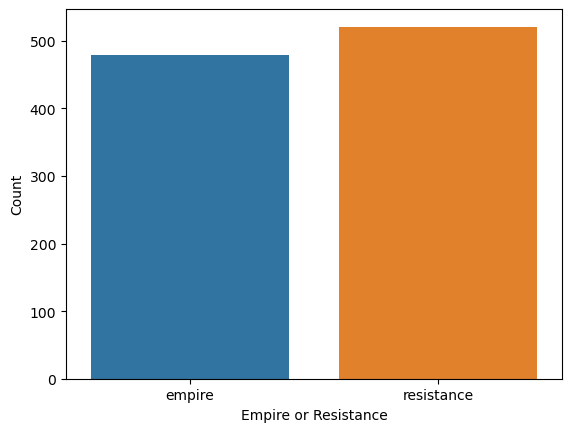

In [7]:
count_plot = sns.countplot(troops, x="empire_or_resistance")
count_plot.set(xlabel='Empire or Resistance', ylabel='Count')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

#assign numeric values to categorical data
# homeworld_nums = pd.get_dummies(troops['homeworld'])
# print(homeworld_nums)
# unit_type_nums = pd.get_dummies(troops['unit_type'])
# print(unit_type_nums)
labels = troops['is_resistance'].to_frame()
num_values = pd.get_dummies(troops[['homeworld', 'unit_type']])
print(num_values)

decision_tree_df = pd.concat([num_values, labels], axis=1)
print(decision_tree_df)


# troops.homeworld = troops.homeworld.astype('category').cat.codes
# troops.unit_type = troops.unit_type.astype('category').cat.codes
# troops

     homeworld_Alderaan  homeworld_Aleen Minor  homeworld_Bestine IV  \
0                     0                      0                     0   
1                     0                      0                     0   
2                     0                      0                     0   
3                     1                      0                     0   
4                     0                      0                     0   
..                  ...                    ...                   ...   
995                   0                      0                     0   
996                   0                      0                     0   
997                   0                      0                     0   
998                   0                      0                     0   
999                   0                      0                     0   

     homeworld_Cerea  homeworld_Champala  homeworld_Chandrila  \
0                  0                   0                    0   
1    

In [9]:
#split dataset in features and target variable
# feature_cols = ['homeworld', 'unit_type']
# X = troops[feature_cols] # Features
# Y = troops['is_resistance'] # Target variable

X = decision_tree_df.iloc[:, 0:50]

# df.iloc[1:3, 0:3]

print(X)
Y = decision_tree_df.is_resistance

labels=troops['empire_or_resistance']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

# evaluate success of model
metrics.confusion_matrix(Y_test, Y_pred)


     homeworld_Alderaan  homeworld_Aleen Minor  homeworld_Bestine IV  \
0                     0                      0                     0   
1                     0                      0                     0   
2                     0                      0                     0   
3                     1                      0                     0   
4                     0                      0                     0   
..                  ...                    ...                   ...   
995                   0                      0                     0   
996                   0                      0                     0   
997                   0                      0                     0   
998                   0                      0                     0   
999                   0                      0                     0   

     homeworld_Cerea  homeworld_Champala  homeworld_Chandrila  \
0                  0                   0                    0   
1    

array([[102,  31],
       [ 82,  85]], dtype=int64)

In [10]:
clf.score(X_train, Y_train)

0.82

In [11]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.6233333333333333


In [12]:
importances = clf.feature_importances_
features = clf.feature_names_in_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

In [13]:
print(feature_importances)

                         Feature  Importance
0             homeworld_Alderaan    0.053048
1          homeworld_Aleen Minor    0.008396
2           homeworld_Bestine IV    0.013638
3                homeworld_Cerea    0.002606
4             homeworld_Champala    0.011731
5            homeworld_Chandrila    0.003631
6         homeworld_Concord Dawn    0.007967
7             homeworld_Corellia    0.037104
8              homeworld_Dagobah    0.039154
9             homeworld_Dathomir    0.013289
10               homeworld_Dorin    0.006607
11              homeworld_Eriadu    0.009400
12         homeworld_Glee Anselm    0.013154
13          homeworld_Haruun Kal    0.001902
14             homeworld_Iktotch    0.005494
15            homeworld_Iridonia    0.013675
16               homeworld_Kalee    0.012352
17            homeworld_Kashyyyk    0.003759
18           homeworld_Malastare    0.019555
19              homeworld_Mirial    0.003756
20            homeworld_Mon Cala    0.017873
21        

[Text(0, 0, 'homeworld_Alderaan'),
 Text(1, 0, 'homeworld_Aleen Minor'),
 Text(2, 0, 'homeworld_Bestine IV'),
 Text(3, 0, 'homeworld_Cerea'),
 Text(4, 0, 'homeworld_Champala'),
 Text(5, 0, 'homeworld_Chandrila'),
 Text(6, 0, 'homeworld_Concord Dawn'),
 Text(7, 0, 'homeworld_Corellia'),
 Text(8, 0, 'homeworld_Dagobah'),
 Text(9, 0, 'homeworld_Dathomir'),
 Text(10, 0, 'homeworld_Dorin'),
 Text(11, 0, 'homeworld_Eriadu'),
 Text(12, 0, 'homeworld_Glee Anselm'),
 Text(13, 0, 'homeworld_Haruun Kal'),
 Text(14, 0, 'homeworld_Iktotch'),
 Text(15, 0, 'homeworld_Iridonia'),
 Text(16, 0, 'homeworld_Kalee'),
 Text(17, 0, 'homeworld_Kashyyyk'),
 Text(18, 0, 'homeworld_Malastare'),
 Text(19, 0, 'homeworld_Mirial'),
 Text(20, 0, 'homeworld_Mon Cala'),
 Text(21, 0, 'homeworld_Muunilinst'),
 Text(22, 0, 'homeworld_Naboo'),
 Text(23, 0, 'homeworld_Ojom'),
 Text(24, 0, 'homeworld_Quermia'),
 Text(25, 0, 'homeworld_Rodia'),
 Text(26, 0, 'homeworld_Ryloth'),
 Text(27, 0, 'homeworld_Serenno'),
 Text(28, 0, 

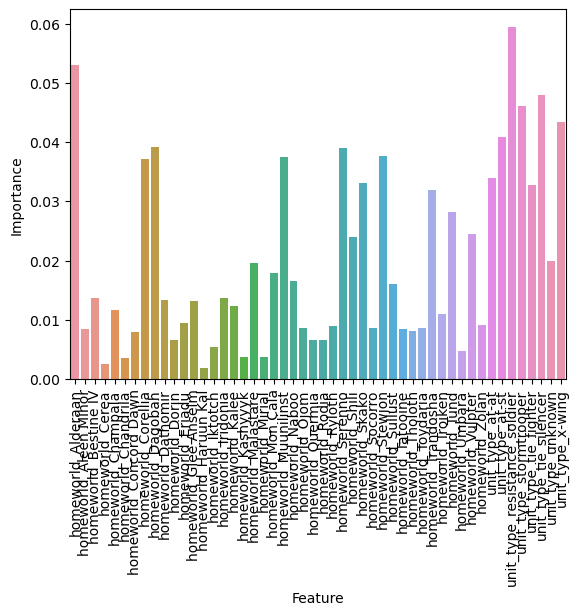

In [20]:
bar_graph = sns.barplot(feature_importances, x="Feature", y="Importance", orient="v")
bar_graph.set_xticklabels(bar_graph.get_xticklabels(), rotation=90)